In [1]:
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
from datetime import datetime

In [2]:
# Setup splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)


In [3]:
#url of page to be scraped
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
#retrieve page with the requests modul
browser.visit(url)


In [4]:
#set an HTML object
html = browser.html

#parse HTML with Beautiful Soup
soup = BeautifulSoup(html, 'html.parser')

#location of the table that contains all the needed data
result = soup.find('table', class_='table')

In [5]:
for query in result:
    print(query)



<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>74

In [6]:
headers = []
data = []

#scrape headers
for tr in result.find_all("tr"):
    header=([th.text for th in tr.find_all('th')])
    headers.append(header)

#scrape each row
for tr in result.find_all("tr"):
    row=([td.text for td in tr.find_all('td')])
    data.append(row)


In [7]:
#from the list, only saves the first header/entry
headers = headers[0:1]
print(headers)

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']]


In [8]:
browser.quit()

In [9]:
mars_temp_df = pd.DataFrame(data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
mars_temp_df

#print('Hold onto your butts...')

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
#drop rows with null values
mars_temp_df = mars_temp_df.dropna(axis=0,how='all')

In [11]:
#sanity check
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:
#type check
dtypes = mars_temp_df.dtypes
print(dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [13]:
#alter header datatypes to match what we want.
#temperatures and pressure will be float; months in int; date is datetime64; id is int
mars_temp_df = mars_temp_df.astype({'id':int})
mars_temp_df = mars_temp_df.astype({'terrestrial_date':'datetime64'})
mars_temp_df = mars_temp_df.astype({'sol':int})
mars_temp_df = mars_temp_df.astype({'ls':int})
mars_temp_df = mars_temp_df.astype({'month':int})
mars_temp_df = mars_temp_df.astype({'min_temp':float})
mars_temp_df = mars_temp_df.astype({'pressure':float})

In [14]:
#sanity check
dtypes = mars_temp_df.dtypes
print(dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [15]:
#another sanity check
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [16]:
mars_month_max = mars_temp_df['month'].max()
mars_days_max = mars_temp_df['sol'].max() - mars_temp_df['sol'].min() + 1
mars_temp_avg_min = mars_temp_df.groupby(['month'])['min_temp'].mean()
mars_pressure_avg = mars_temp_df.groupby(['month'])['pressure'].mean()

<AxesSubplot:title={'center':'Averaging the minimum daily temperature of Mars months'}, xlabel='month'>

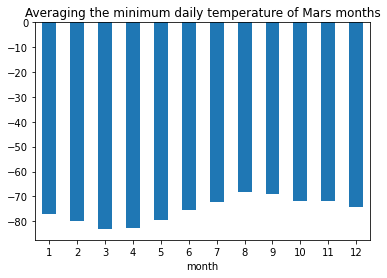

In [17]:
mars_temp_avg_min.plot.bar(
    x='Month on Mars',
    y='Average Minimum Temp',
    title='Averaging the minimum daily temperature of Mars months',
    rot = 0
)

In [18]:
print(f'There are {mars_month_max} months on Mars.')
print(f'There are {mars_days_max} Martian days where data was collected')
print(f'From the data below the 3rd month is the coldest and the 8th month is the warmest')

There are 12 months on Mars.
There are 1968 Martian days where data was collected
From the data below the 3rd month is the coldest and the 8th month is the warmest


<AxesSubplot:title={'center':'Averaging the daily atmospheric pressure of Mars months'}, xlabel='month'>

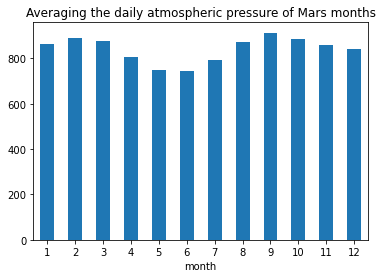

In [19]:
mars_pressure_avg.plot.bar(
    x='Month on Mars',
    y='Average Pressure',
    title='Averaging the daily atmospheric pressure of Mars months',
    rot = 0
)

In [20]:
print(f'From the data below the 6th month is the lowest and the 9th month is the highest in terms of atmospheric pressure')

From the data below the 6th month is the lowest and the 9th month is the highest in terms of atmospheric pressure


In [21]:
earth_start = mars_temp_df['terrestrial_date'].min()
earth_end = mars_temp_df['terrestrial_date'].max()
earth_days_total = (earth_end - earth_start).days
martian_years = 2.5
earth_days_in_martian_year = earth_days_total/2.5


<AxesSubplot:title={'center':'Daily Temperature'}>

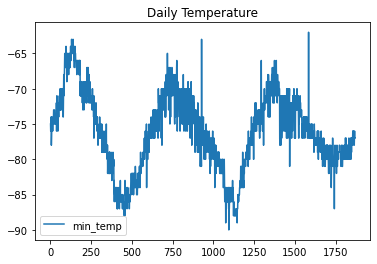

In [22]:
min_temp = mars_temp_df[['min_temp']]
min_temp.plot(title = 'Daily Temperature')

In [23]:
print(f'The data is across {earth_days_total} Earth days and from the plot below it seems like there are 2.5 years worth of Martian data')
print(f'With this information I estimate that there are {earth_days_in_martian_year} Earth days in a Martian year')

The data is across 2021 Earth days and from the plot below it seems like there are 2.5 years worth of Martian data
With this information I estimate that there are 808.4 Earth days in a Martian year


In [24]:
# Confirm output file and export data into a csv
output_csv = 'mars_data_final.csv'

mars_temp_df.to_csv(output_csv, header=True, index=False)